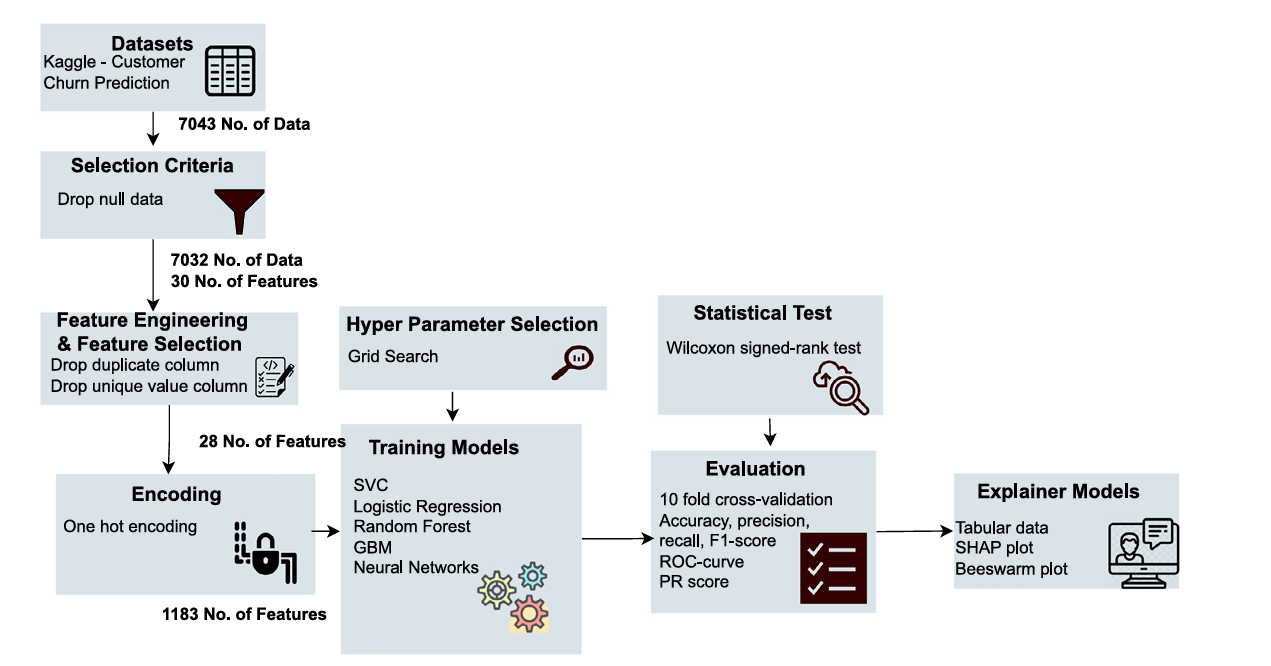

In [54]:
!pip install lazypredict

In [55]:
# Import libraries
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTEENN
import shap
import lime
import lime.lime_tabular
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [56]:
# Load datasets
data_80 = pd.read_csv('churn-bigml-20.csv')
data_20 = pd.read_csv('churn-bigml-80.csv')

# Concatenate datasets by rows
data = pd.concat([data_80, data_20], axis=0, ignore_index=True)


In [57]:
data.shape

(3333, 20)

In [58]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [59]:
data.columns.astype(str)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [61]:
missing_values = data.isnull().sum()
missing_values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [62]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [63]:
sum(data.duplicated())

0

In [64]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x else 0)

In [65]:
data['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [66]:
# Categorical Columns
categorical_cols = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']

# Continuous Columns
continuous_cols = [col for col in data.columns if col not in categorical_cols]

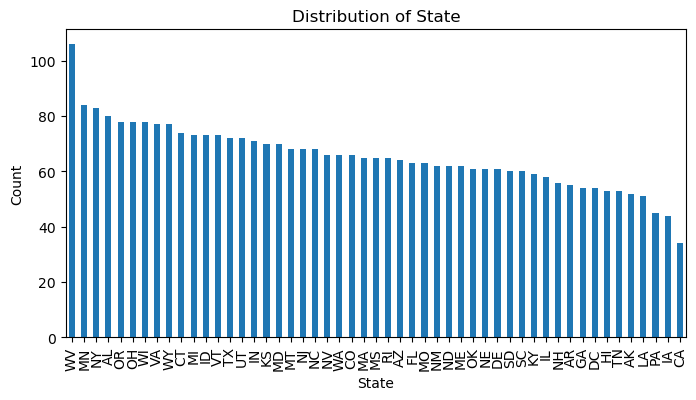

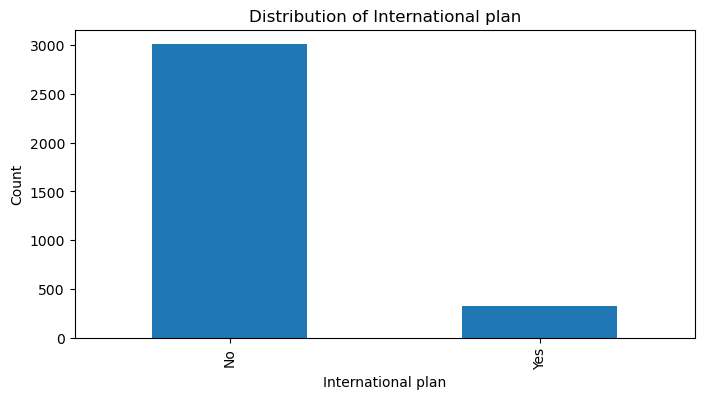

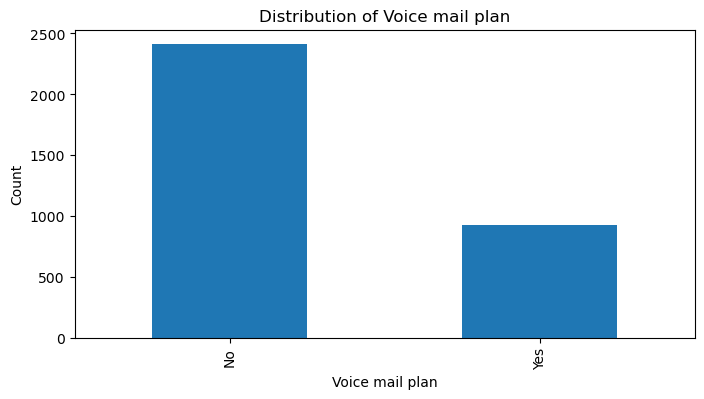

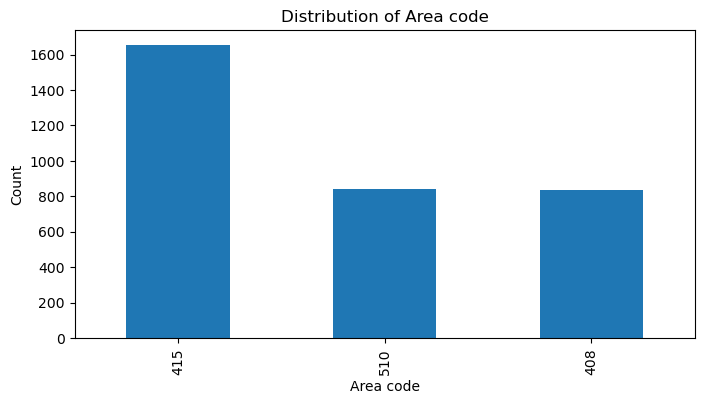

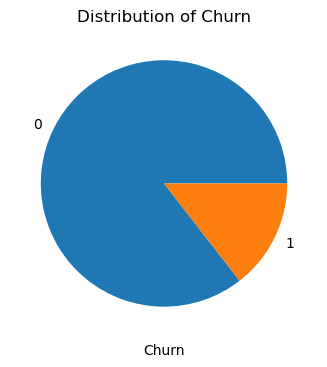

In [67]:
# Plotting categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar' if col != 'Churn' else 'pie')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count' if col != 'Churn' else '')
    plt.xlabel(col)
    plt.show()

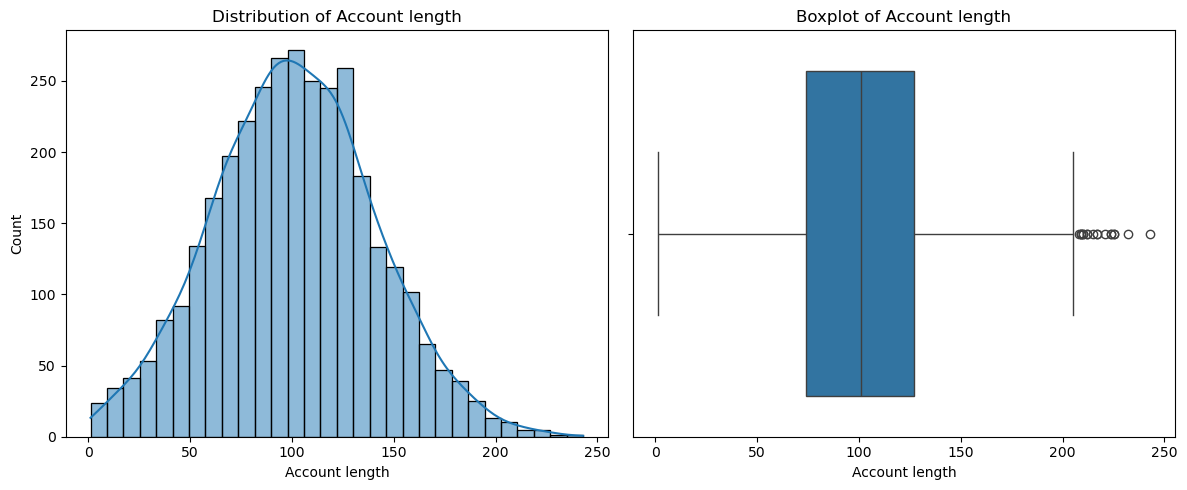

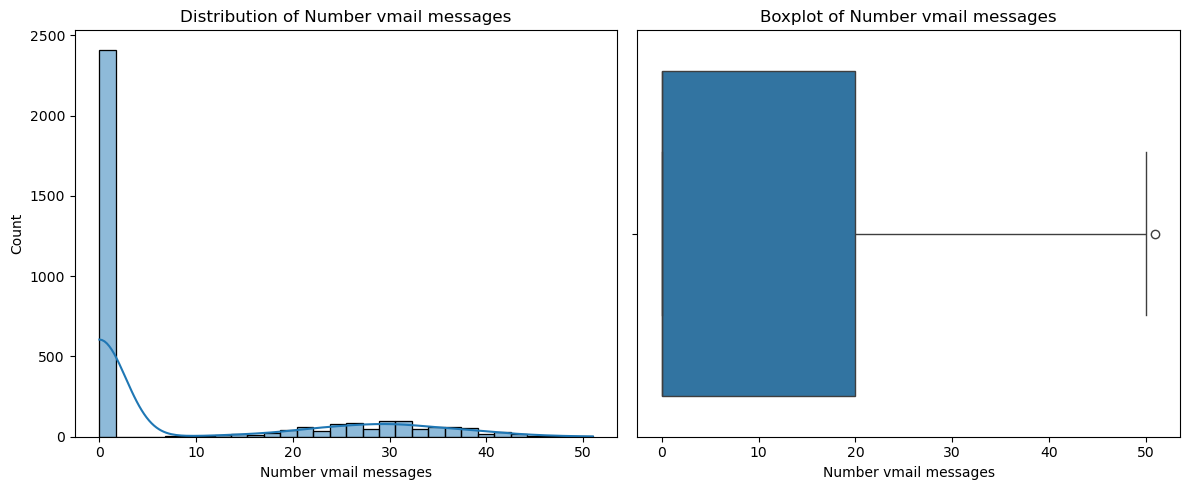

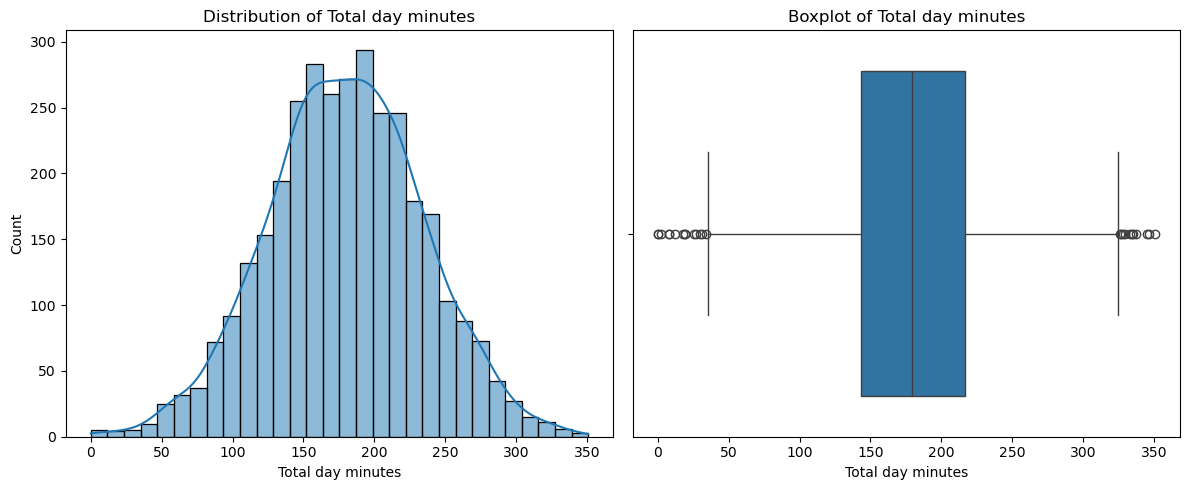

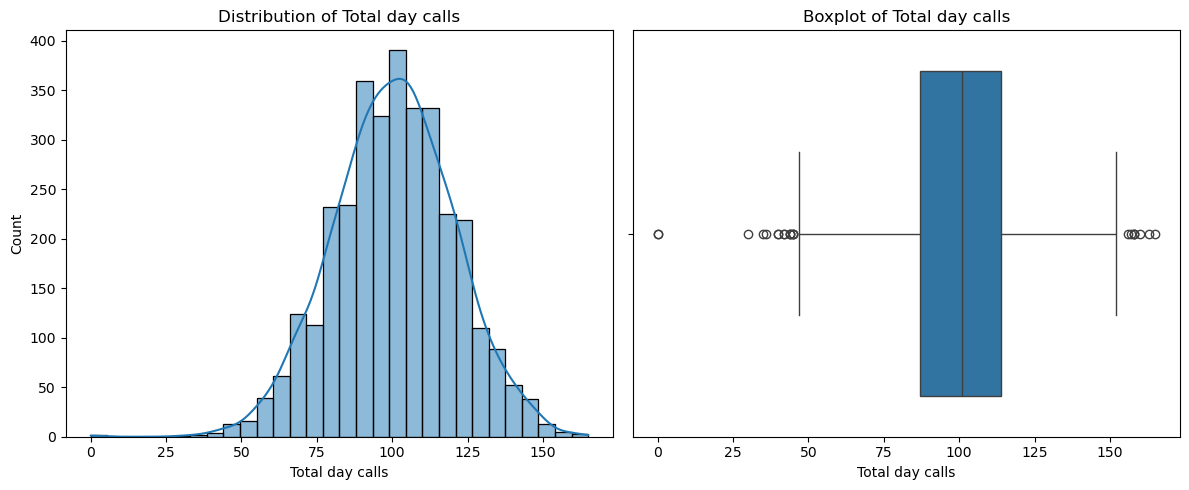

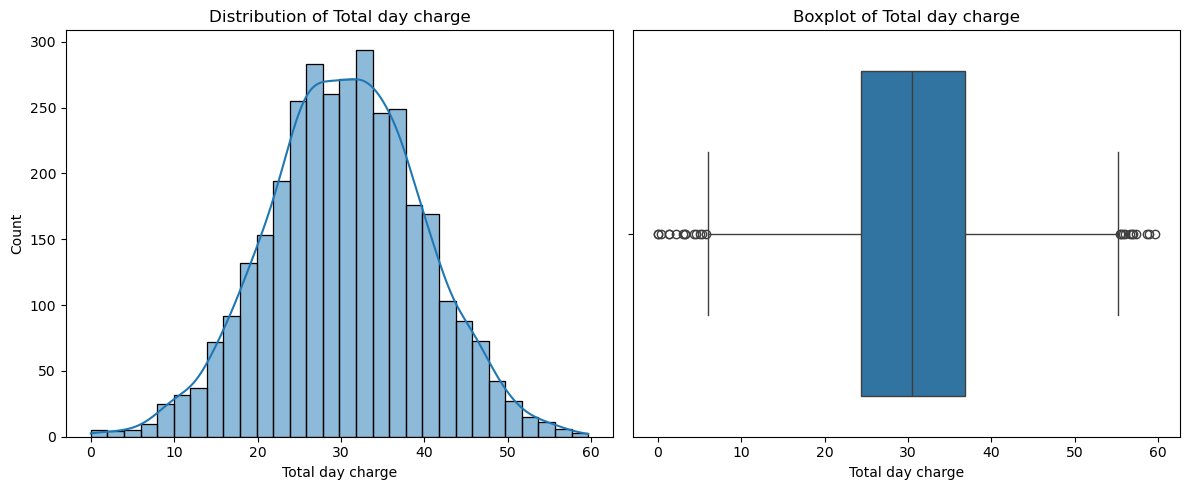

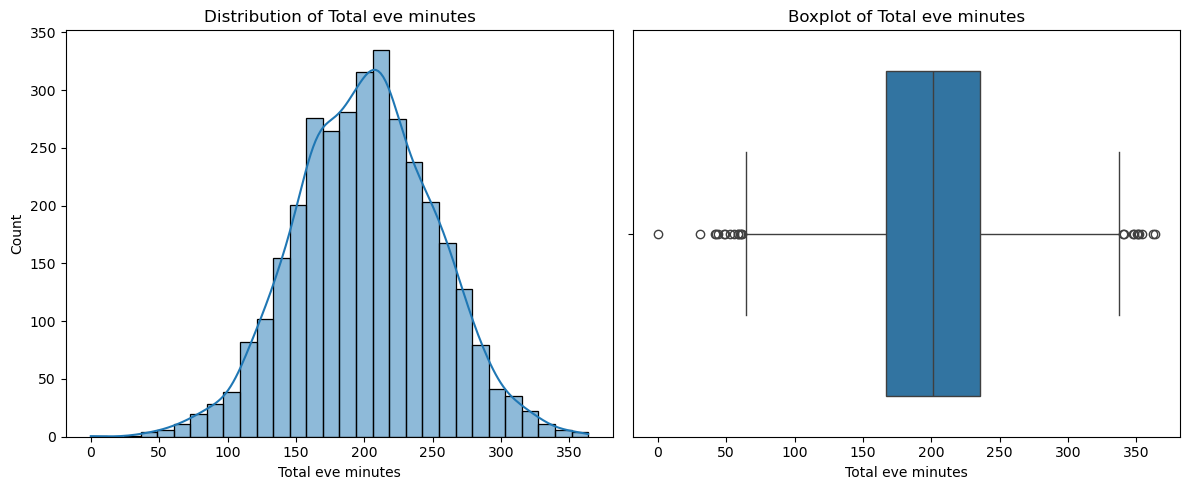

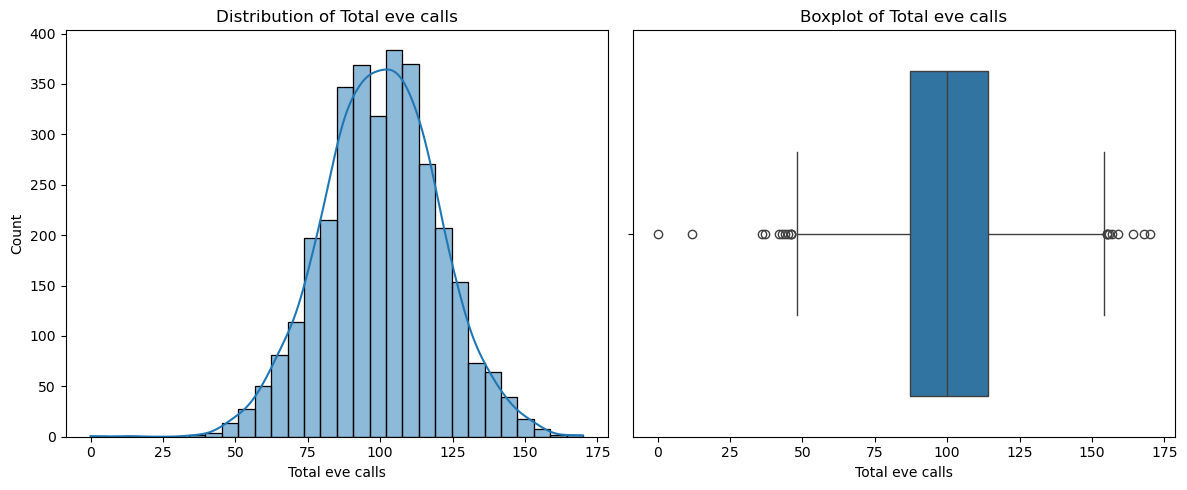

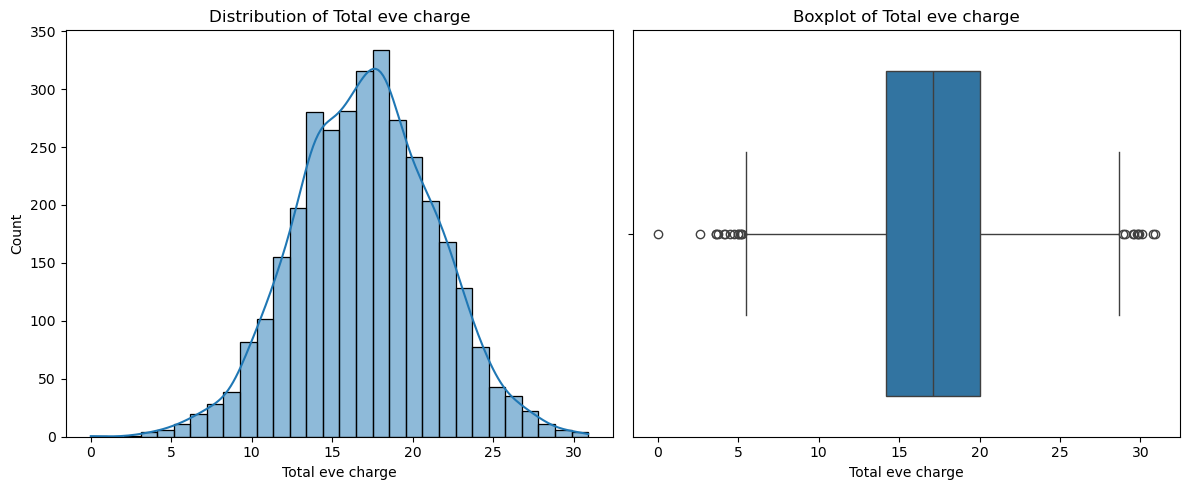

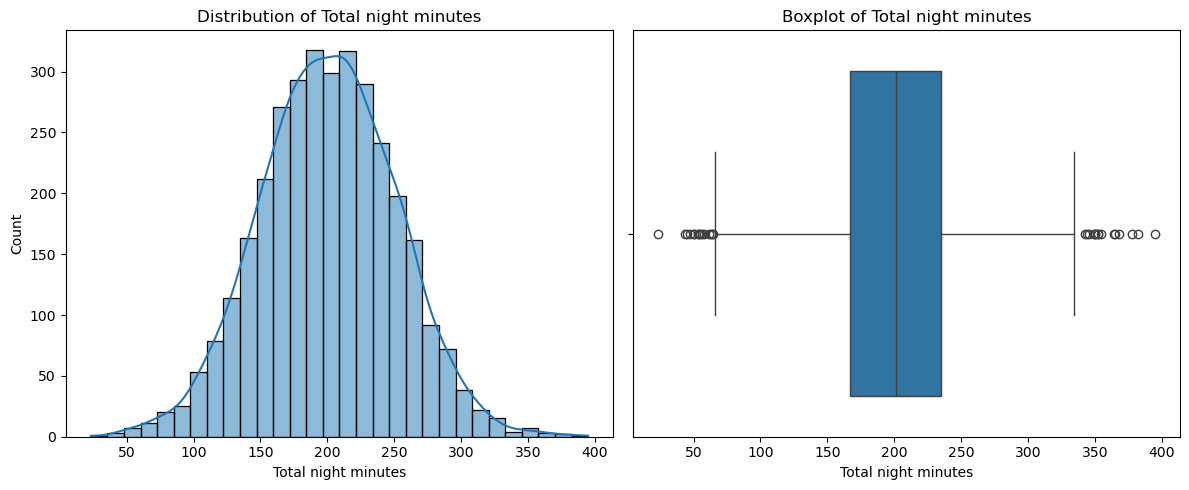

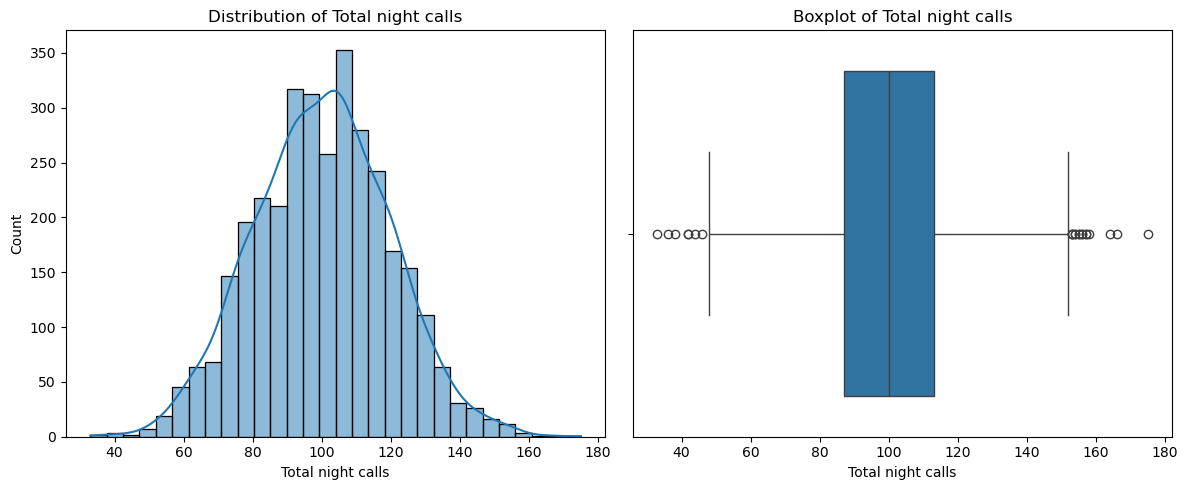

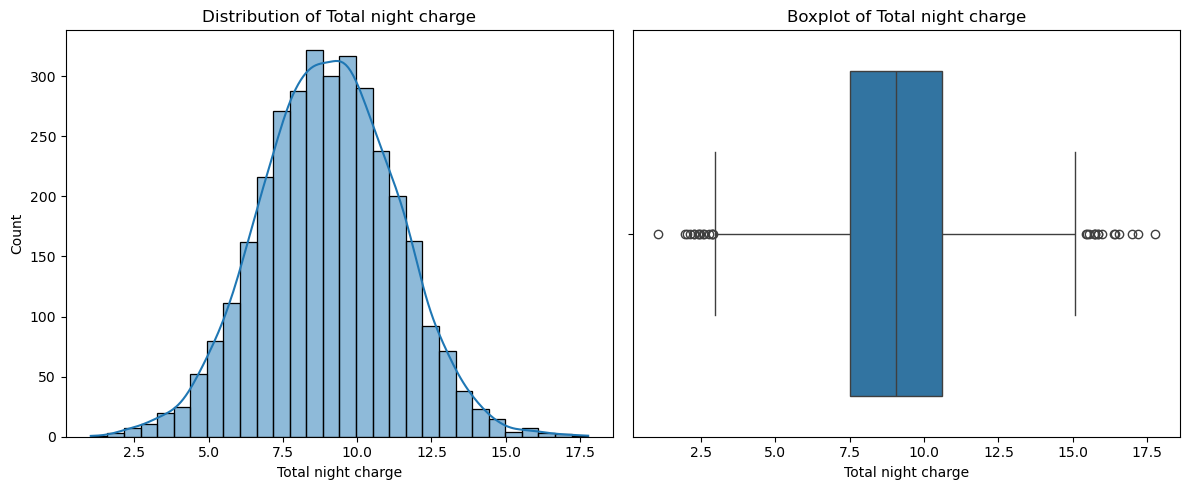

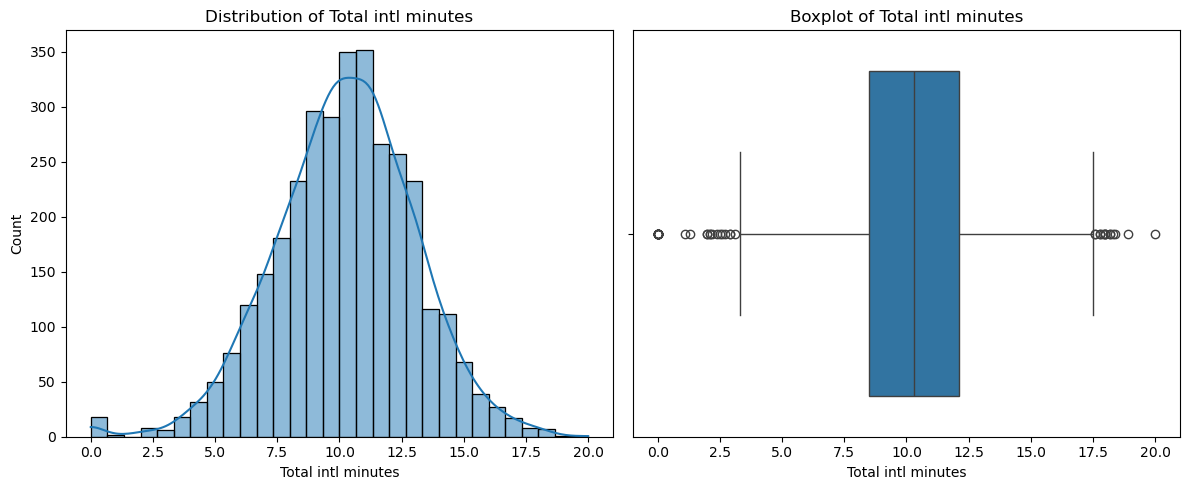

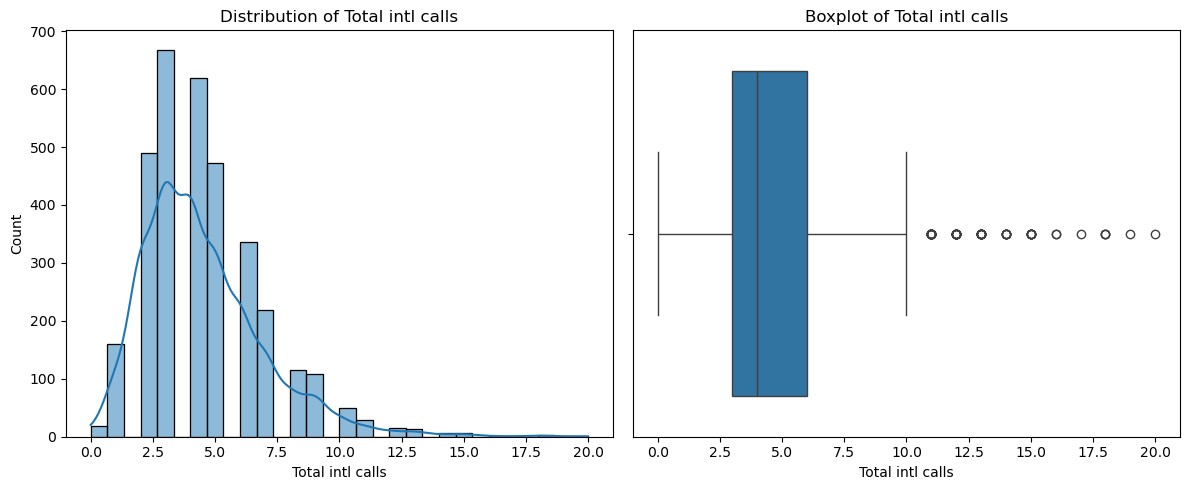

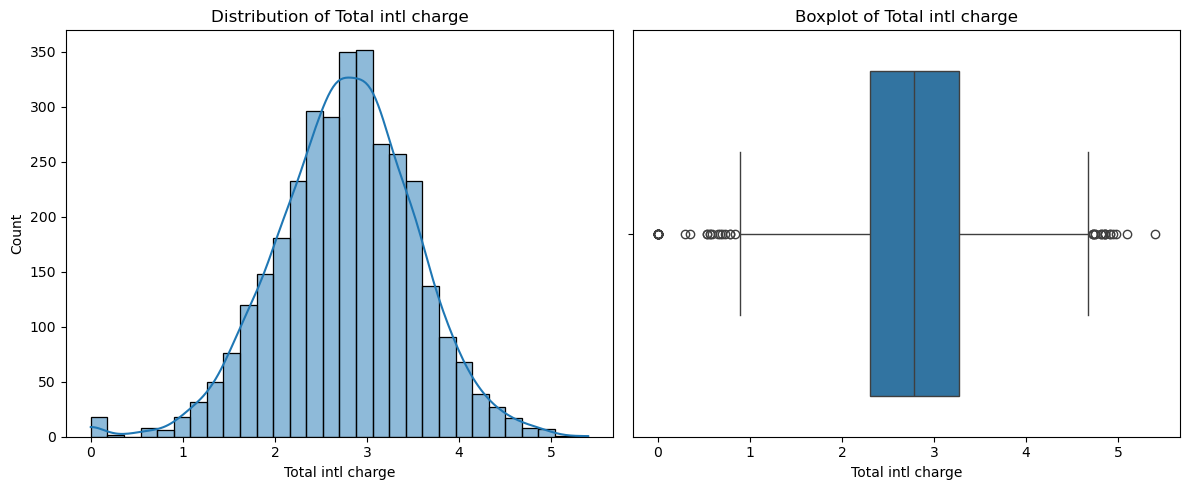

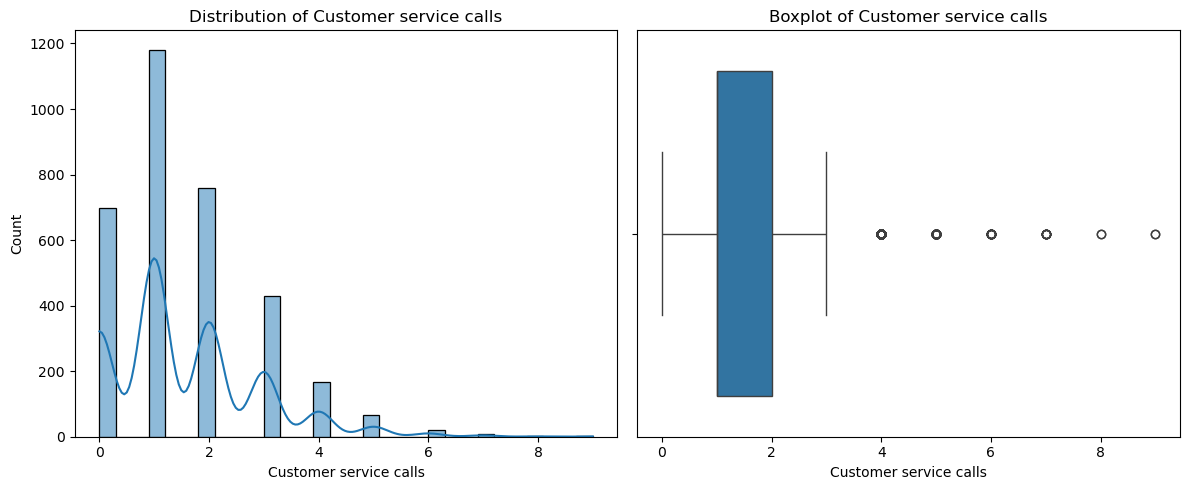

In [68]:

# Plotting continuous columns
for col in continuous_cols:
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [69]:
# Encoding categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [70]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [71]:
data.shape

(3333, 20)

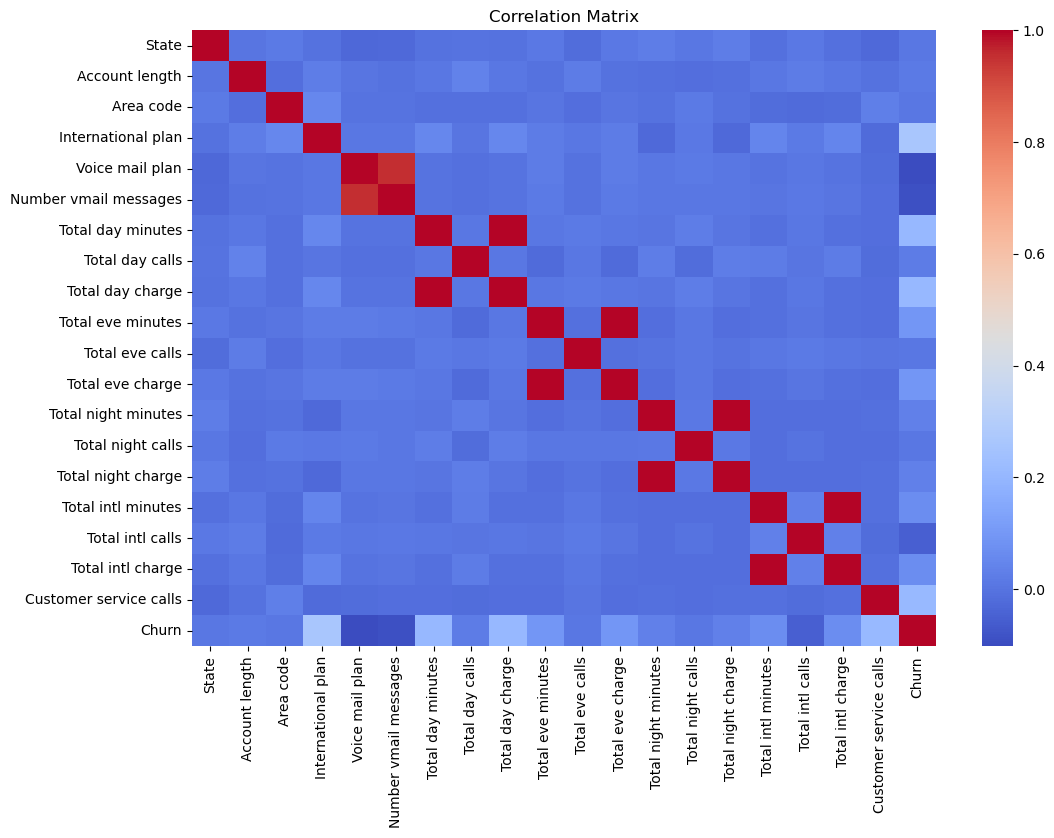

In [72]:
# Feature Correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [73]:
# Splitting features and target
X = data.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data['Churn']

In [74]:
# Outlier Detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [75]:
data.shape

(2335, 20)

In [93]:
# Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced dimensions to: {X_pca.shape[1]}")

PCA reduced dimensions to: 14


In [94]:
# Handle Class Imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_pca, y)

In [95]:
y_resampled.value_counts()

Churn
1    2806
0    2061
Name: count, dtype: int64

In [96]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [97]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import roc_auc_score

# Initialize the LazyRegressor
Lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=roc_auc_score)

# Fit the LazyRegressor and get predictions
models, predictions = Lazy_classifier.fit(X_train, X_test, y_train, y_test)

100%|██████████| 31/31 [00:08<00:00,  3.58it/s]

[LightGBM] [Info] Number of positive: 2254, number of negative: 1639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 3893, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.578988 -> initscore=0.318620
[LightGBM] [Info] Start training from score 0.318620


In [98]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,roc_auc_score,Time Taken
Model,,,,,,
LabelPropagation,0.99,0.99,0.99,0.99,0.99,0.61
LabelSpreading,0.99,0.99,0.99,0.99,0.99,0.91
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.97,0.39
LGBMClassifier,0.96,0.96,0.96,0.96,0.96,0.18
XGBClassifier,0.96,0.96,0.96,0.96,0.96,0.23
KNeighborsClassifier,0.96,0.95,0.95,0.96,0.95,0.14
RandomForestClassifier,0.95,0.95,0.95,0.95,0.95,1.16
BaggingClassifier,0.94,0.94,0.94,0.94,0.94,0.50
SVC,0.93,0.93,0.93,0.93,0.93,1.25


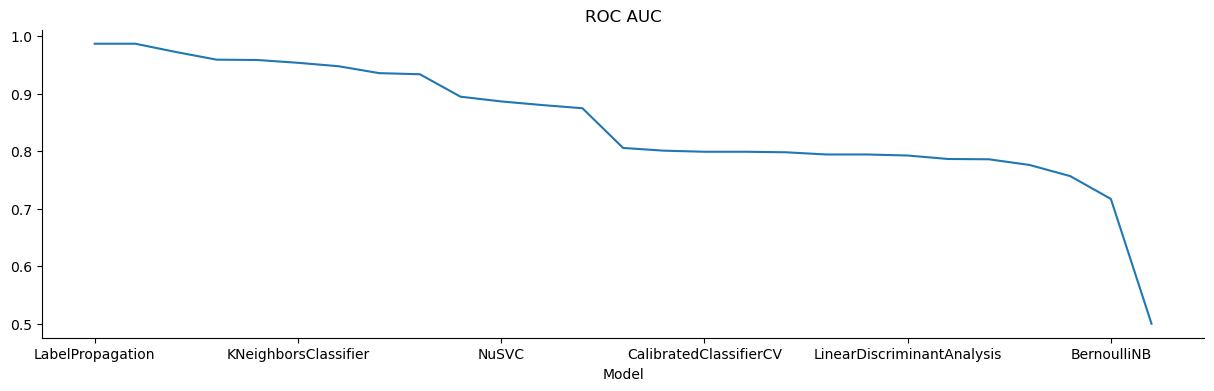

In [99]:
# @title ROC AUC

from matplotlib import pyplot as plt
models['ROC AUC'].plot(kind='line', figsize=(15, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

In [100]:
"""# Train Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True)
}"""

'# Train Models\nmodels = {\n    "Random Forest": RandomForestClassifier(),\n    "Gradient Boosting": GradientBoostingClassifier(),\n    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\'),\n    "Logistic Regression": LogisticRegression(),\n    "SVM": SVC(probability=True)\n}'

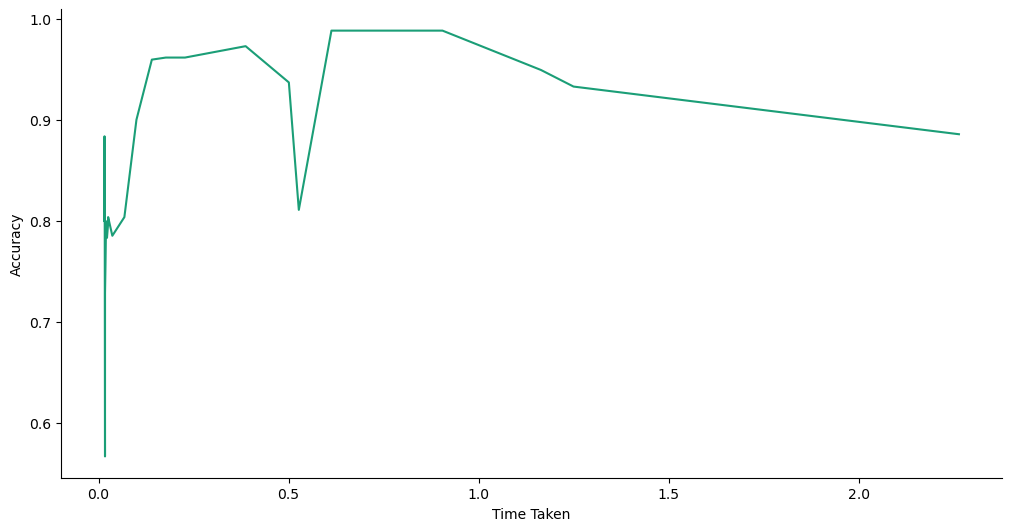

In [101]:
# @title Time Taken vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Accuracy')

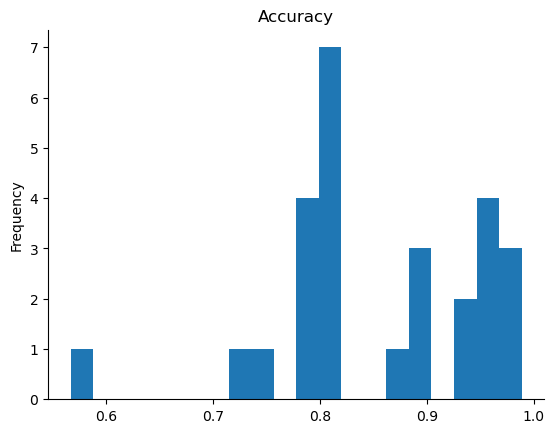

In [102]:
# @title Accuracy

from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Define the model (replace with your model)
model = GradientBoostingClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=10, scoring='accuracy')

# Print the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean accuracy across all folds:", cv_scores.mean())
print("Standard deviation across all folds:", cv_scores.std())


Cross-validation scores for each fold: [0.86858316 0.87679671 0.89117043 0.89938398 0.91170431 0.90554415
 0.90349076 0.88888889 0.89917695 0.90740741]
Mean accuracy across all folds: 0.8952146762322443
Standard deviation across all folds: 0.01316691100967718


In [111]:
param_grids = {
    'SVC': {
        'model': SVC(),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 464.0812108]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [5.15e-05, 0.001, 0.01, 1, 100, 4534347.358]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_depth': range(19, 25),
            'n_estimators': range(19, 25)
        }
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(5,), (6,), (7,), (8,), (9,)],
            'activation': ['relu'],
            'solver': ['adam']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': range(50, 501, 50),
            'learning_rate': [0.01, 0.1, 0.3, 0.5, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': range(100, 1100, 100),
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
        }
    }
}


In [112]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

# Enable MLflow autologging
mlflow.autolog()

# Placeholder to store results
best_models = {}

# Set up MLflow experiment (optional)
mlflow.set_experiment("Models Grid Search")

# Perform Grid Search for each model
for name, config in param_grids.items():
    with mlflow.start_run(run_name=name):  # Start a new run for each model
        print(f"Starting Grid Search for {name}...")
        
        # Grid Search
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                                   scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
        grid_search.fit(X_resampled, y_resampled)  # Replace with your dataset

        # Extract and save the best estimator
        best_models[name] = grid_search.best_estimator_

        print(f"Best params for {name}: {grid_search.best_params_}\n")

# Display all best models
print("Best Models and Hyperparameters:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


2024/11/26 20:09:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/11/26 20:09:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/11/26 20:09:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/11/26 20:09:10 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Starting Grid Search for SVC...
Fitting 10 folds for each of 7 candidates, totalling 70 fits


2024/11/26 20:10:01 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:10:05 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:10:05 INFO mlflow.sklearn.utils: Logging the 5 best runs, 2 runs will be omitted.
2024/11/26 20:10:05 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' 

Best params for SVC: {'C': 100}

Starting Grid Search for LogisticRegression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


2024/11/26 20:10:10 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:10:13 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:10:13 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2024/11/26 20:10:14 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series'

Best params for LogisticRegression: {'C': 1}

Starting Grid Search for RandomForest...
Fitting 10 folds for each of 36 candidates, totalling 360 fits


2024/11/26 20:10:48 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:10:52 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:10:52 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2024/11/26 20:10:52 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series'

Best params for RandomForest: {'max_depth': 21, 'n_estimators': 20}

Starting Grid Search for NeuralNetwork...
Fitting 10 folds for each of 5 candidates, totalling 50 fits


2024/11/26 20:11:54 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:11:57 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:11:57 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/11/26 20:11:58 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series'

Best params for NeuralNetwork: {'activation': 'relu', 'hidden_layer_sizes': (8,), 'solver': 'adam'}

Starting Grid Search for AdaBoost...
Fitting 10 folds for each of 50 candidates, totalling 500 fits


2024/11/26 20:18:47 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:18:51 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:18:51 INFO mlflow.sklearn.utils: Logging the 5 best runs, 45 runs will be omitted.
2024/11/26 20:18:51 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series'

Best params for AdaBoost: {'learning_rate': 0.3, 'n_estimators': 250}

Starting Grid Search for XGBoost...
Fitting 10 folds for each of 50 candidates, totalling 500 fits


2024/11/26 20:21:37 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:21:41 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/11/26 20:21:41 INFO mlflow.sklearn.utils: Logging the 5 best runs, 45 runs will be omitted.


Best params for XGBoost: {'learning_rate': 0.1, 'n_estimators': 1000}

Best Models and Hyperparameters:
SVC: SVC(C=100)
LogisticRegression: LogisticRegression(C=1, max_iter=1000)
RandomForest: RandomForestClassifier(max_depth=21, n_estimators=20)
NeuralNetwork: MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000)
AdaBoost: AdaBoostClassifier(learning_rate=0.3, n_estimators=250)
XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
   

In [113]:
import pickle

# Save best parameters and models to a file
with open('best_models.pkl', 'wb') as f:
    pickle.dump(best_models, f)



Evaluating SVC...
********************************************************
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
********************************************************


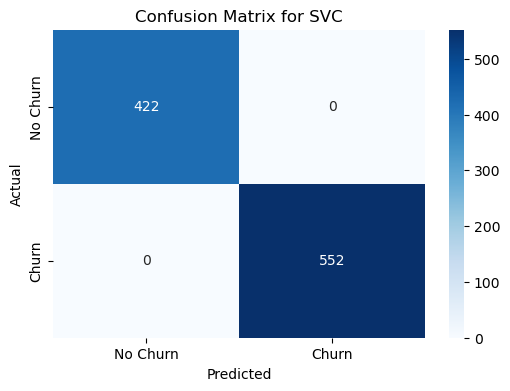


Evaluating LogisticRegression...
********************************************************
Accuracy: 0.8028747433264887
Precision: 0.8214285714285714
Recall: 0.8333333333333334
F1 Score: 0.8273381294964028
ROC-AUC: 0.7981832543443919
********************************************************


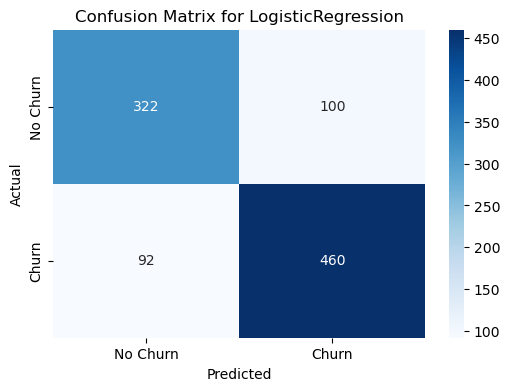


Evaluating RandomForest...
********************************************************
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
********************************************************


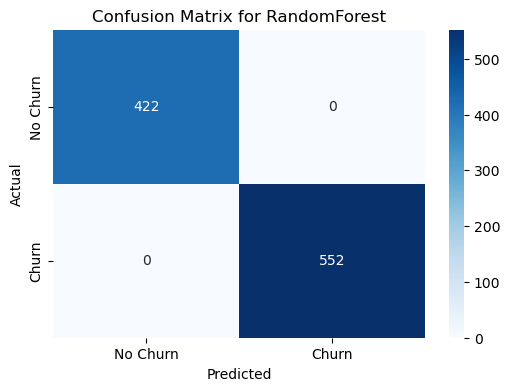


Evaluating NeuralNetwork...
********************************************************
Accuracy: 0.9322381930184805
Precision: 0.9533582089552238
Recall: 0.9257246376811594
F1 Score: 0.9393382352941176
ROC-AUC: 0.933241465760011
********************************************************


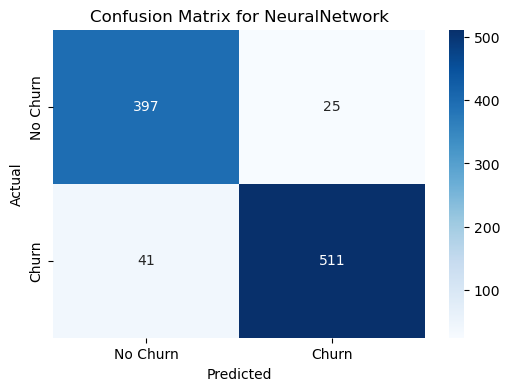


Evaluating AdaBoost...
********************************************************
Accuracy: 0.8552361396303901
Precision: 0.8624338624338624
Recall: 0.8858695652173914
F1 Score: 0.8739946380697051
ROC-AUC: 0.8505177209973213
********************************************************


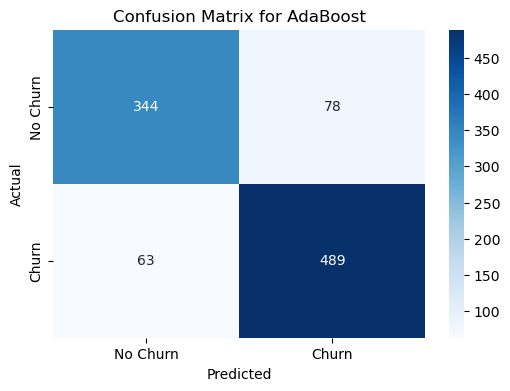


Evaluating XGBoost...
********************************************************
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
********************************************************


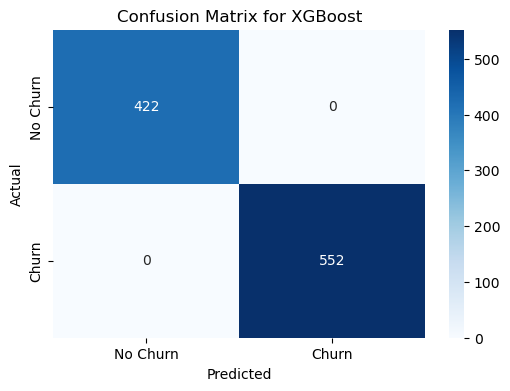

In [118]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Generate confusion matrices
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    print("********************************************************")
    # Evaluate metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
    print("********************************************************")

    plot_confusion_matrix(y_test, y_pred, model_name)



2024/11/26 21:02:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3c48b44a0dab4e049b8359b54922efc0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/26 21:02:40 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/11/26 21:02:47 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.18.0, required: mlflow==2.16.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


********************************************************
Accuracy: 0.8901437371663244
Precision: 0.9190207156308852
Recall: 0.8840579710144928
F1 Score: 0.9012003693444137
ROC-AUC: 0.9585694415825262
********************************************************


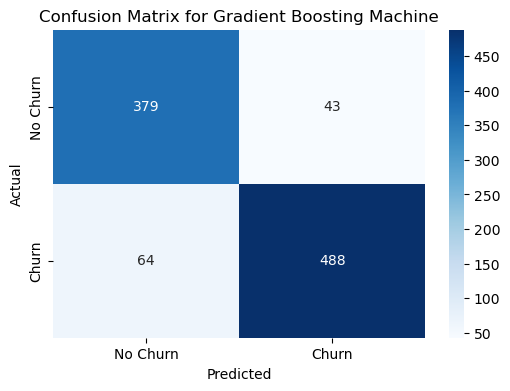

SHAP Summary Plot for Gradient Boosting Machine


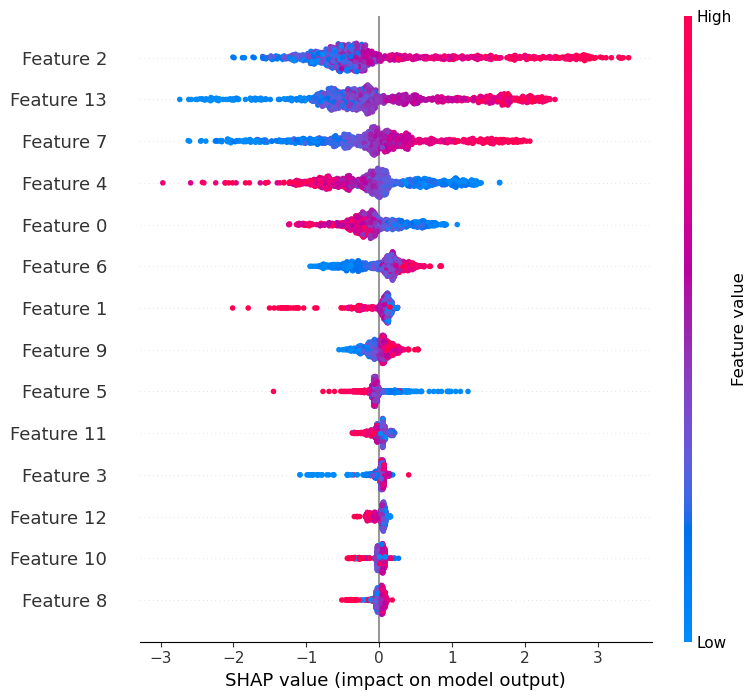

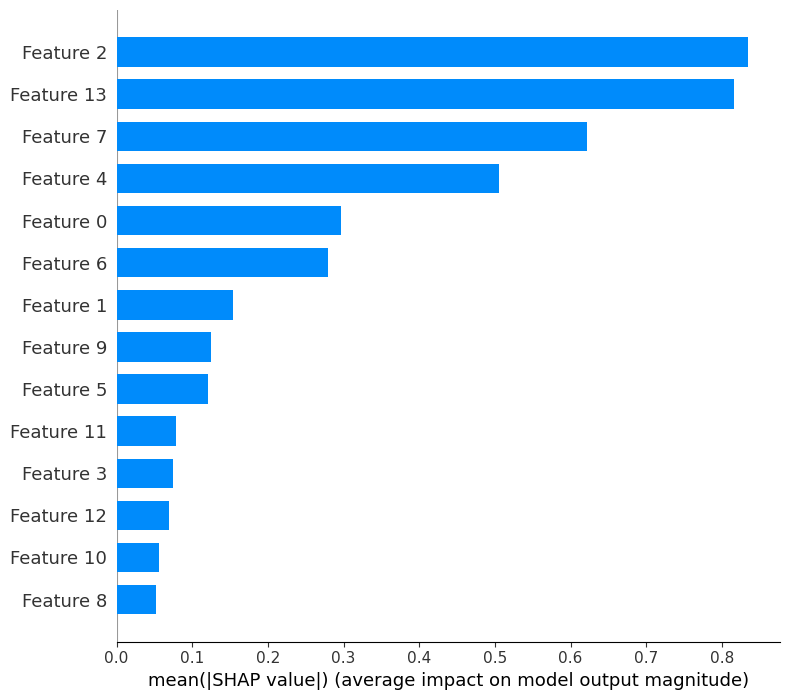

In [121]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Create and train GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

# 2. Make predictions
y_pred = gbm_model.predict(X_test)

# 3. Evaluate metrics
print("********************************************************")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])}")
print("********************************************************")

# 4. Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for GBM
plot_confusion_matrix(y_test, y_pred, "Gradient Boosting Machine")

# 5. SHAP Explainer and Summary Plot
# Create SHAP explainer for GBM model
explainer = shap.TreeExplainer(gbm_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary plot (Beeswarm)
print("SHAP Summary Plot for Gradient Boosting Machine")
shap.summary_plot(shap_values, X_test)

# SHAP Summary plot (Bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)



# Summary plot
shap.summary_plot(shap_values[1], X_test)

# Beeswarm plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


AssertionError: Summary plots need a matrix of shap_values, not a vector.